# Lecture 2 Preprocessing

*Note: This file systematically summarizes the key data preprocessing methods. In the future lectures, we will revisit these preprocessing methods when necessary (based on the requirement of the models).* 

In [1]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# Type it in the first cell of your notebook, then your matplotlib plots will be included next to your codes. 
# Otherwise, include plt.show()

### Prep: Data Loading

We use the same data 'train.csv' for the practice of data preprocessing. Load data first.




In [2]:
# data loading
df = pd.read_csv('train.csv')

## 1. Data Preprocessing
In most cases, we rely on sklearn.preprocessing module to complete data preprocessing. Examples include scaling and encoding. As the implementation of sklearn is consistent across different scenarios (e.g., preprocessing, model training, etc.), we save this coding part for the next lecture.

### Section 1.1 Skewed Data
Consider log transfer and square root transfer. These can be done by simple calculation using numpy (i.e. np.log(), np.sqrt()).

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

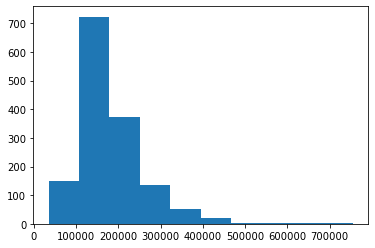

In [3]:
# Check Original Distribution
x = df['SalePrice']
plt.hist(x)

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <BarContainer object of 10 artists>)

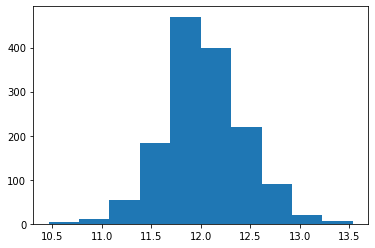

In [4]:
# Now check distribution with log transfer
log_x = np.log(x)

plt.hist(log_x)

## Note: sometimes, we use log(x+1), 
## especially when your data contains lots x_min  = 0, and x_max is not small (e.g., x_max>10) 

(array([ 17., 116., 505., 444., 233.,  92.,  38.,   7.,   6.,   2.]),
 array([186.81541692, 255.02461122, 323.23380551, 391.4429998 ,
        459.65219409, 527.86138839, 596.07058268, 664.27977697,
        732.48897126, 800.69816556, 868.90735985]),
 <BarContainer object of 10 artists>)

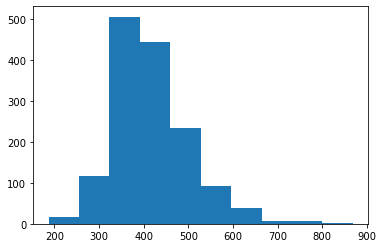

In [5]:
# See how it works for sqrt
sqrt_x = np.sqrt(x)

plt.hist(sqrt_x)

### Section 1.2 Data Scaling and Encoding
Data scaling and encoding syntax are under Scikit-Learn package Preprocessing Module. Coding when using sklearn packages is longer and follows a standard workflow. We will elaborate the workflow in linear regression section. In the current section, we only provide the syntax and coding template.

For specific parameter settings, please check the sklearn manual. You can simple copy and paste the syntax in Google to find the official manual.

**Standard Scaler:** For standardization (i.e., applying standard scaler), use syntax:

**<center>sklearn.preprocessing.StandardScaler()</center>**

**Min-Max Scaler:** For min-max scaler, use syntax:

**<center>sklearn.preprocessing.MinMaxScaler()</center>**

**One-Hot Encoding:** 
For One-hot encoding, use syntax: 

**<center>sklearn.preprocessing.OneHotEncoder()</center>**

**Ordinal Encoding**
For ordinal encoding, use syntax:
**<center>sklearn.preprocessing.OrdinalEncoder()</center>**

In [6]:
# Try Scaling: original unscaled features
var = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF']
X = df[var]
X.describe()

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,1057.429452
std,79442.502883,1.382997,525.480383,0.747315,438.705324
min,34900.000000,1.000000,334.000000,0.000000,0.000000
25%,129975.000000,5.000000,1129.500000,1.000000,795.750000
50%,163000.000000,6.000000,1464.000000,2.000000,991.500000
75%,214000.000000,7.000000,1776.750000,2.000000,1298.250000
max,755000.000000,10.000000,5642.000000,4.000000,6110.000000


In [7]:
# Standard scaler
from sklearn.preprocessing import StandardScaler # load the function, selective import

scaler = StandardScaler()                    # define scaler

X_standardized = scaler.fit_transform(X)     # obtain transfered X. Returns a Numpy array

# The scaled data is: X_standardized

In [8]:
# Now let's check the summary statistics of X_standardized
## (For simple summary, change 2D numpy array to pandas dataframe, and get summary statistics)
new_dataframe = pd.DataFrame(X_standardized, columns = var)
print(new_dataframe.describe())  # focus on mean and std
print(X_standardized.mean(axis=0)) # This provides the mean of each variable

          SalePrice   OverallQual     GrLivArea    GarageCars   TotalBsmtSF
count  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03  1.460000e+03
mean   1.180182e-16 -7.680310e-17 -1.446332e-16  2.585451e-17  2.063038e-16
std    1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00  1.000343e+00
min   -1.838704e+00 -3.688413e+00 -2.249120e+00 -2.365440e+00 -2.411167e+00
25%   -6.415162e-01 -7.951515e-01 -7.347485e-01 -1.026858e+00 -5.966855e-01
50%   -2.256643e-01 -7.183611e-02 -9.797004e-02  3.117246e-01 -1.503334e-01
75%    4.165294e-01  6.514792e-01  4.974036e-01  3.117246e-01  5.491227e-01
max    7.228819e+00  2.821425e+00  7.855574e+00  2.988889e+00  1.152095e+01
[ 1.36268470e-16  1.38701835e-16 -1.27751691e-16  1.21668277e-16
  2.45769919e-16]


In [9]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)

## Now X_minmax is the transferred var
# let's check the min and max for each variable:
print(X_minmax.min(axis = 0), X_minmax.max(axis = 0)) 

[0. 0. 0. 0. 0.] [1. 1. 1. 1. 1.]


In [10]:
## Then work on categorical Encoding

# Let's first collect two categorical variables
catvar = ['SaleType', 'SaleCondition']
X_cat = df[catvar]   # X_cat: two categorical variables


# Syntax below shows the unique values under each categorical var
df.SaleType.value_counts(), df.SaleCondition.value_counts() 
## 9 values for SaleType; 6 values for SaleCondition

(WD       1267
 New       122
 COD        43
 ConLD       9
 ConLI       5
 ConLw       5
 CWD         4
 Oth         3
 Con         2
 Name: SaleType, dtype: int64,
 Normal     1198
 Partial     125
 Abnorml     101
 Family       20
 Alloca       12
 AdjLand       4
 Name: SaleCondition, dtype: int64)

In [11]:
# Check our X_cat data
X_cat.head()

,SaleType,SaleCondition
0,WD,Normal
1,WD,Normal
2,WD,Normal
3,WD,Abnorml
4,WD,Normal


In [12]:
# One-hot Encoder
from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(handle_unknown='ignore', sparse = False) # handle_unknown: whether to report error when missings are found
                                                                    # sparse: set it to True improves efficiency. Currently set to False for presentation purpose
X_encoded = my_encoder.fit_transform(X_cat)
# Transfered data: X_encoded

In [13]:
X_encoded # Values are now 0s and 1s

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [14]:
print(X_encoded.shape) # we have 15 binary features (recall we have 9+6 = 15 distinct values)
print(my_encoder.categories_) # This shows all the categories. The variables are generated based on the order of the specific array.

(1460, 15)
[array(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'],
      dtype=object), array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)]


In [15]:
# Now try ordinal encoding - keep in mind this is not an appropriate approach for our current scenario
from sklearn.preprocessing import OrdinalEncoder
my_encoder_ord = OrdinalEncoder(handle_unknown='ignore')
# if you receive error from the previous syntax, then comment it out and try this:
# my_encoder_ord = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = 999)

## The reason for possible error is the version inconsistency of sklearn package.

In [16]:
X_encoded_ord = my_encoder_ord.fit_transform(X_cat)
X_encoded_ord.shape # this time we have 2 features
print(my_encoder_ord.categories_)  # The values of each new variable is the index of the corresponding category within the array.

[array(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'],
      dtype=object), array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
      dtype=object)]


In [17]:
X_cat

,SaleType,SaleCondition
0,WD,Normal
1,WD,Normal
2,WD,Normal
3,WD,Abnorml
4,WD,Normal
...,...,...
1455,WD,Normal
1456,WD,Normal
1457,WD,Normal
1458,WD,Normal


In [18]:
X_encoded_ord 
#  Refer back to the output of "my_encoder_ord.categories_": 
## the values are the index of the categorical value in the corresponding array

array([[8., 4.],
       [8., 4.],
       [8., 4.],
       ...,
       [8., 4.],
       [8., 4.],
       [8., 4.]])